# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# pip install citipy

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

99f96a0396de356f1b82d64d481006c5


## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

19

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# OpenWeatherMap API Key
api_key = weather_api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_list = []
country_list = []
lat_list = []
lng_list = []
temperature_list = []
cloud_list = []
humidity_list = []
wind_speed_list = []

record_counter = 0

print('------------------------')
print('Beginning Weather Check')
print('------------------------')

for city in cities:
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will
    # not have have records in all the cities generated by CityPy module
    try: 
    
        query_url = url + "&q=" + city
        # Get weather data
        response = requests.get(query_url).json()

    #     response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        temperature_list.append(response['main']['temp_max'])    
        cloud_list.append(response["clouds"]["all"])
        humidity_list.append(response["main"]["humidity"])

    #    date_list.append(response["dt"])
        wind_speed_list.append(response["wind"]["speed"])
        record_counter += 1
        print('Retrieving data from city of {} ==> Record {}'.format(city, record_counter))
    
#         # If no record found "skip" to next city
    except:
        print('-------------------------')
        print("There are not enough weather information{}. Skip record.")
        print('-------------------------')
        #         print(query_url)


    pass
    
    
    
    
    


print('-------------------------')
print('Finished weather check')
print('-------------------------')

------------------------
Beginning Weather Check
------------------------
Retrieving data from city of arraial do cabo ==> Record 1
Retrieving data from city of cape town ==> Record 2
Retrieving data from city of zhigansk ==> Record 3
Retrieving data from city of santiago del estero ==> Record 4
Retrieving data from city of egvekinot ==> Record 5
Retrieving data from city of hofn ==> Record 6
Retrieving data from city of hobart ==> Record 7
Retrieving data from city of gravdal ==> Record 8
Retrieving data from city of hithadhoo ==> Record 9
Retrieving data from city of saint-francois ==> Record 10
Retrieving data from city of muskogee ==> Record 11
Retrieving data from city of namwala ==> Record 12
Retrieving data from city of pevek ==> Record 13
Retrieving data from city of port lincoln ==> Record 14
Retrieving data from city of colac ==> Record 15
Retrieving data from city of laguna ==> Record 16
Retrieving data from city of atbasar ==> Record 17
Retrieving data from city of thompson

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# move data to dictionary and the DF
weather_data_dict = {
    "City": city_list,
    "Lat":lat_list, 
    "Lng":lng_list, 
    "Country":country_list,
    "Max.Temp": temperature_list,    
    "Humidity": humidity_list,   
    "Cloudiness":cloud_list, 
    "Wind Speed":wind_speed_list
}

# Create a data frame from dictionary
weather_data_df = pd.DataFrame(weather_data_dict)

# Display count of weather data values 
# weather_data_df.count()
weather_data_df



,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
0,Arraial do Cabo,-22.9661,-42.0278,BR,27.00,69,20,5.66
1,Cape Town,-33.9258,18.4232,ZA,19.44,63,20,8.23
2,Zhigansk,66.7697,123.3711,RU,-30.18,90,100,0.97
3,Santiago del Estero,-27.7951,-64.2615,AR,22.91,56,98,1.34
4,Egvekinot,66.3167,-179.1667,RU,-22.30,73,59,3.63
5,Hofn,64.2539,-15.2082,IS,7.23,88,44,7.94
6,Hobart,-42.8794,147.3294,AU,13.33,87,75,2.57
7,Gravdal,68.1214,13.5031,NO,5.00,65,75,5.66
8,Hithadhoo,-0.6000,73.0833,MV,28.08,74,99,5.34
9,Saint-François,46.4154,3.9054,FR,2.22,75,0,3.09


In [23]:
# Save data frame to CSV
# i have anticipated step
weather_data_df.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
# humid_100_df = weather_data_df.loc[reduced_df["Drug Regimen"] == 100,:]

humid_100_df = weather_data_df.loc[weather_data_df["Humidity"] == 94,:]

humid_100_df

,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
11,Namwala,-15.7504,26.4384,ZM,17.72,94,0,1.43


In [25]:
#  Get the indices of cities that have humidity over 100%.
humid_100_df.index

Int64Index([11], dtype='int64')

In [26]:
# # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call 
# # "clean_city_data".

# # clean_city_data_df = weather_data_df.drop(weather_data_df["Humidity"] == 94.index, inplace=False)
# # clean_city_data_df = weather_data_df.loc(weather_data_df["Humidity"] == 94, inplace=False)
# clean_city_data_df = weather_data_df.loc(weather_data_df["Humidity"] == 94)


# #  clean_city_data_df =df.drop(df[df.score < 50].index, inplace=True)
# clean_city_data_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [27]:
# weather_data_df.columns

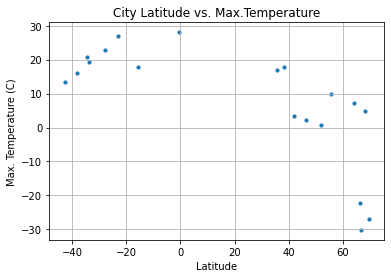

In [28]:

# Scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Max.Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max.Temperature")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_vs_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

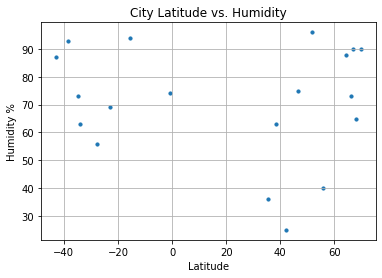

In [29]:

# Scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

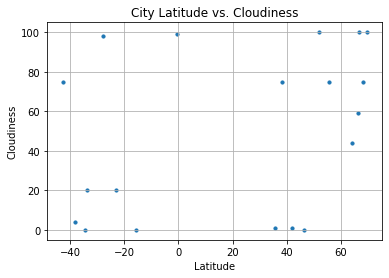

In [30]:
# Scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

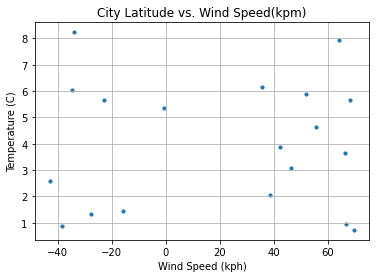

In [31]:
# Scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(kpm)")
plt.ylabel("Temperature (C)")
plt.xlabel("Wind Speed (kph)")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_vs_Wind.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:

# Create Northern and Southern Hemisphere DataFrames
north_lat = weather_data_df.loc[weather_data_df["Lat"] >= 0]
south_lat = weather_data_df.loc[weather_data_df["Lat"] < 0]

north_lat

,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
2,Zhigansk,66.7697,123.3711,RU,-30.18,90,100,0.97
4,Egvekinot,66.3167,-179.1667,RU,-22.30,73,59,3.63
5,Hofn,64.2539,-15.2082,IS,7.23,88,44,7.94
7,Gravdal,68.1214,13.5031,NO,5.00,65,75,5.66
9,Saint-François,46.4154,3.9054,FR,2.22,75,0,3.09
10,Muskogee,35.5834,-95.3336,US,17.00,36,1,6.17
12,Pevek,69.7008,170.3133,RU,-26.91,90,100,0.73
15,Laguna,38.4210,-121.4238,US,17.78,63,75,2.06
16,Atbasar,51.8000,68.3333,KZ,0.87,96,100,5.89
17,Thompson,55.7435,-97.8558,CA,10.00,40,75,4.63


In northern hemisphere he correlation coeficient between Max.Temperature and Latitude is -0.71


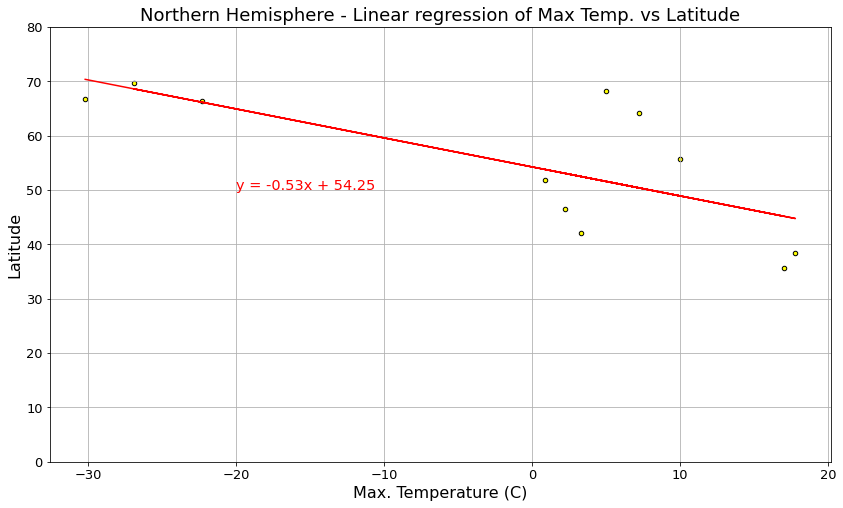

In [37]:
#---------------------------------

# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat["Max.Temp"], north_lat["Lat"])
regress_values = north_lat["Max.Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(north_lat["Max.Temp"],north_lat["Lat"])                 # pearson method
correlation = round(correlation[0],2)                 # round value with 2 decimals
# Print answer of above calculation
print(f"In northern hemisphere he correlation coeficient between Max.Temperature and Latitude is {correlation}")





plt.figure(figsize=(14, 8))                                        # Set up total size of graph

# Plot linear regression on top of scatter plot ----------------------------------------------------
# Plot scatter
plt.scatter(north_lat["Max.Temp"], north_lat["Lat"],
            s=20, 
            color="yellow",
            edgecolors='black')

# plot linear regression with variables
plt.plot(north_lat["Max.Temp"],regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(-20,50),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

# Add labels and title to plot
plt.title("Northern Hemisphere - Linear regression of Max Temp. vs Latitude",fontsize =18)
plt.xlabel("Max. Temperature (C)",fontsize =16)
plt.ylabel("Latitude",fontsize =16)
plt.xticks(fontsize=13)
plt.yticks(np.arange(0, 90, 10.0))  
plt.yticks(fontsize=13)
plt.grid()

# Save the figure
plt.savefig("figures/Northern_Regression_Max_temp_vs_Latitude.png")

# Show plot
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In southern hemisphere he correlation coeficient between Max.Temperature and Latitude is 0.73


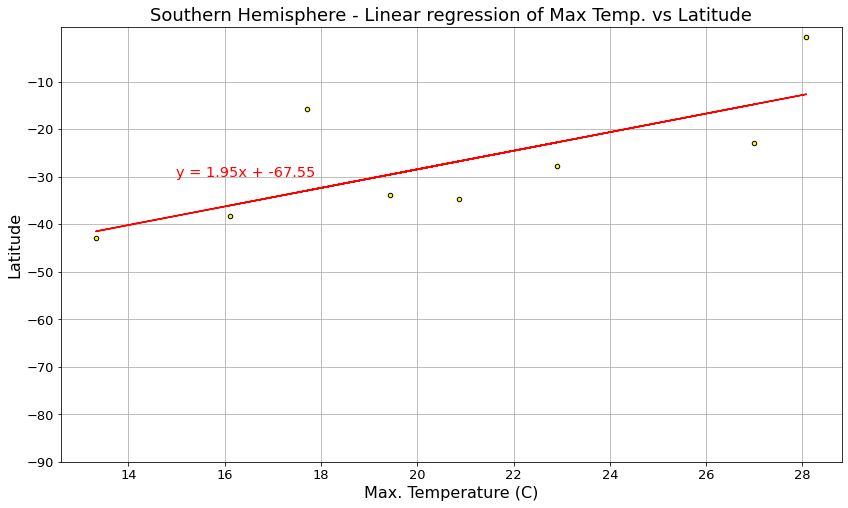

In [54]:
# variables:

x = south_lat["Max.Temp"]
y = south_lat["Lat"]


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)                 # pearson method
correlation = round(correlation[0],2)                 # round value with 2 decimals
# Print answer of above calculation
print(f"In southern hemisphere he correlation coeficient between Max.Temperature and Latitude is {correlation}")





plt.figure(figsize=(14, 8))     # Set up total size of graph

# Plot linear regression on top of scatter plot ----------------------------------------------------
# Plot scatter
plt.scatter(x, y,
            s=20, 
            color="yellow",
            edgecolors='black')

# plot linear regression with variables
plt.plot(x,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(15,-30),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

# Add labels and title to plot
 
plt.title("Southern Hemisphere - Linear regression of Max Temp. vs Latitude",fontsize =18)
plt.xlabel("Max. Temperature (C)",fontsize =16)
plt.ylabel("Latitude",fontsize =16)
plt.xticks(fontsize=13)
plt.yticks(np.arange(-90, 0, 10.0))  
plt.yticks(fontsize=13)
plt.grid()

# Save the figure
plt.savefig("figures/Southern_Regression_Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In Northern Hemisphere he correlation coeficient between Humidity % and Latitude is 0.6


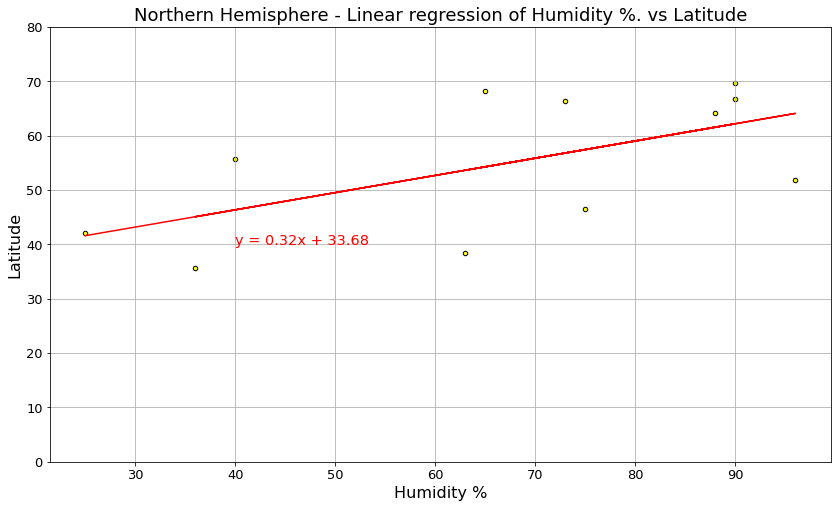

In [59]:
# variables:

x = north_lat["Humidity"]
y = north_lat["Lat"]
text_x = "Humidity %"
where = "Northern Hemisphere"


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)                 # pearson method
correlation = round(correlation[0],2)                 # round value with 2 decimals
# Print answer of above calculation
print(f"In {where} he correlation coeficient between {text_x} and Latitude is {correlation}")

plt.figure(figsize=(14, 8))     # Set up total size of graph

# Plot linear regression on top of scatter plot ----------------------------------------------------
# Plot scatter
plt.scatter(x, y,
            s=20, 
            color="yellow",
            edgecolors='black')

# plot linear regression with variables
plt.plot(x,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(40,40),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

# Add labels and title to plot
 
plt.title(f"{where} - Linear regression of {text_x}. vs Latitude",fontsize =18)
plt.xlabel(text_x,fontsize =16)
plt.ylabel("Latitude",fontsize =16)
plt.xticks(fontsize=13)
plt.yticks(np.arange(0, 90, 10.0))  
plt.yticks(fontsize=13)
plt.grid()

# Save the figure
plt.savefig("figures/Northern_Regression_Humidity_vs_Latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In Southern Hemisphere he correlation coeficient between Humidity % and Latitude is -0.09


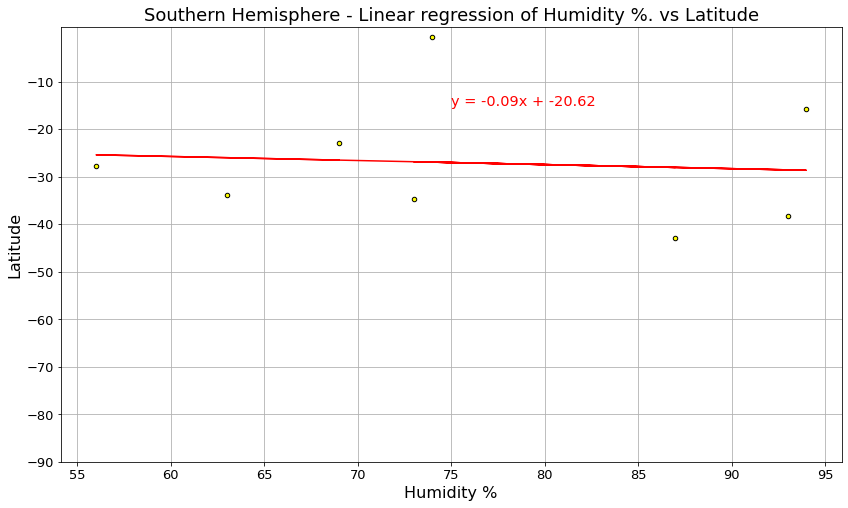

In [69]:
# variables:

x = south_lat["Humidity"]
y = south_lat["Lat"]
text_x = "Humidity %"
where = "Southern Hemisphere"


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)                 # pearson method
correlation = round(correlation[0],2)                 # round value with 2 decimals
# Print answer of above calculation
print(f"In {where} he correlation coeficient between {text_x} and Latitude is {correlation}")

plt.figure(figsize=(14, 8))     # Set up total size of graph

# Plot linear regression on top of scatter plot ----------------------------------------------------
# Plot scatter
plt.scatter(x, y,
            s=20, 
            color="yellow",
            edgecolors='black')

# plot linear regression with variables
plt.plot(x,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(75,-15),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

# Add labels and title to plot
 
plt.title(f"{where} - Linear regression of {text_x}. vs Latitude",fontsize =18)
plt.xlabel(text_x,fontsize =16)
plt.ylabel("Latitude",fontsize =16)
plt.xticks(fontsize=13)
plt.yticks(np.arange(-90, 0, 10.0))  
plt.yticks(fontsize=13)
plt.grid()

# Save the figure
plt.savefig("figures/Southern_Regression_Humidity_vs_Latitude.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In Northern Hemisphere he correlation coeficient between Cloudiness and Latitude is 0.61


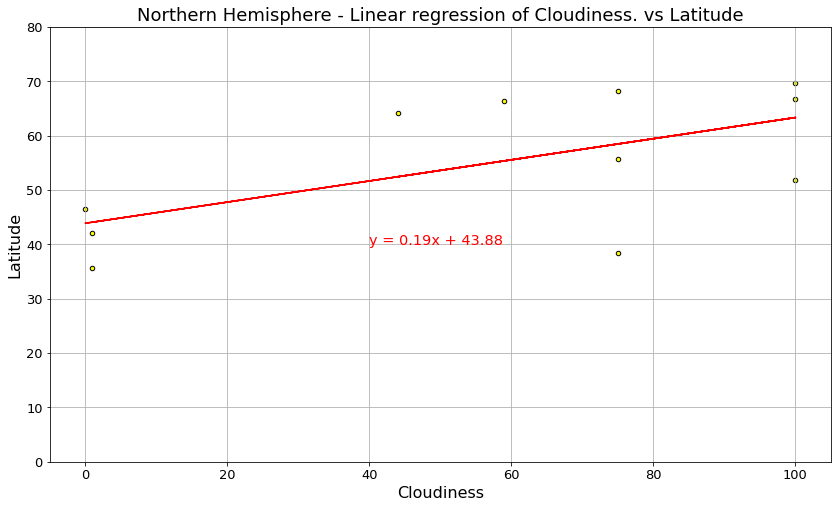

In [65]:
# variables:

x = north_lat["Cloudiness"]
y = north_lat["Lat"]
text_x = "Cloudiness"
where = "Northern Hemisphere"


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)                 # pearson method
correlation = round(correlation[0],2)                 # round value with 2 decimals
# Print answer of above calculation
print(f"In {where} he correlation coeficient between {text_x} and Latitude is {correlation}")

plt.figure(figsize=(14, 8))     # Set up total size of graph

# Plot linear regression on top of scatter plot ----------------------------------------------------
# Plot scatter
plt.scatter(x, y,
            s=20, 
            color="yellow",
            edgecolors='black')

# plot linear regression with variables
plt.plot(x,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(40,40),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

# Add labels and title to plot
 
plt.title(f"{where} - Linear regression of {text_x}. vs Latitude",fontsize =18)
plt.xlabel(text_x,fontsize =16)
plt.ylabel("Latitude",fontsize =16)
plt.xticks(fontsize=13)
plt.yticks(np.arange(0, 90, 10.0))  
plt.yticks(fontsize=13)
plt.grid()

# Save the figure
plt.savefig("figures/Northern_Regression_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In Southern Hemisphere he correlation coeficient between Cloudiness % and Latitude is 0.3


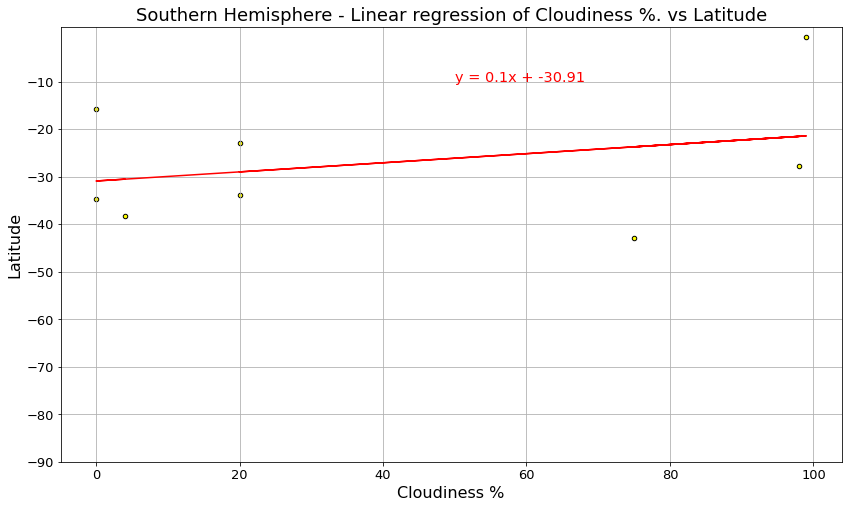

In [74]:
# variables:

x = south_lat["Cloudiness"]
y = south_lat["Lat"]
text_x = "Cloudiness %"
where = "Southern Hemisphere"


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)                 # pearson method
correlation = round(correlation[0],2)                 # round value with 2 decimals
# Print answer of above calculation
print(f"In {where} he correlation coeficient between {text_x} and Latitude is {correlation}")

plt.figure(figsize=(14, 8))     # Set up total size of graph

# Plot linear regression on top of scatter plot ----------------------------------------------------
# Plot scatter
plt.scatter(x, y,
            s=20, 
            color="yellow",
            edgecolors='black')

# plot linear regression with variables
plt.plot(x,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(50,-10),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

# Add labels and title to plot
 
plt.title(f"{where} - Linear regression of {text_x}. vs Latitude",fontsize =18)
plt.xlabel(text_x,fontsize =16)
plt.ylabel("Latitude",fontsize =16)
plt.xticks(fontsize=13)
plt.yticks(np.arange(-90, 0, 10.0))  
plt.yticks(fontsize=13)
plt.grid()

# Save the figure
plt.savefig("figures/Southern_Regression_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In Northern Hemisphere he correlation coeficient between Wind Speed (kph) and Latitude is -0.12


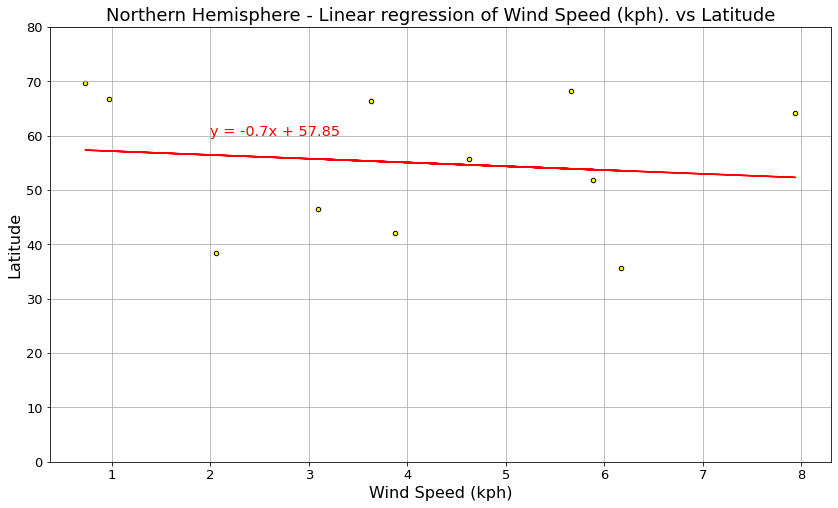

In [73]:
x = north_lat["Wind Speed"]
y = north_lat["Lat"]
text_x = "Wind Speed (kph)"
where = "Northern Hemisphere"


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)                 # pearson method
correlation = round(correlation[0],2)                 # round value with 2 decimals
# Print answer of above calculation
print(f"In {where} he correlation coeficient between {text_x} and Latitude is {correlation}")

plt.figure(figsize=(14, 8))     # Set up total size of graph

# Plot linear regression on top of scatter plot ----------------------------------------------------
# Plot scatter
plt.scatter(x, y,
            s=20, 
            color="yellow",
            edgecolors='black')

# plot linear regression with variables
plt.plot(x,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(2,60),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

# Add labels and title to plot
 
plt.title(f"{where} - Linear regression of {text_x}. vs Latitude",fontsize =18)
plt.xlabel(text_x,fontsize =16)
plt.ylabel("Latitude",fontsize =16)
plt.xticks(fontsize=13)
plt.yticks(np.arange(0, 90, 10.0))  
plt.yticks(fontsize=13)
plt.grid()

# Save the figure
plt.savefig("figures/Northern_Regression_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In Southern Hemisphere he correlation coeficient between Wind Speed (kph) and Latitude is 0.11


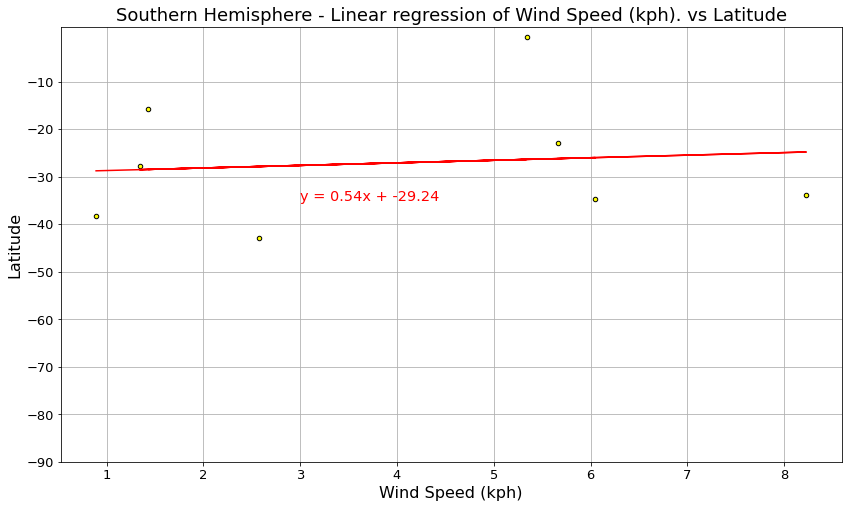

In [78]:
# variables:

x = south_lat["Wind Speed"]
y = south_lat["Lat"]
text_x = "Wind Speed (kph)"
where = "Southern Hemisphere"


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)                 # pearson method
correlation = round(correlation[0],2)                 # round value with 2 decimals
# Print answer of above calculation
print(f"In {where} he correlation coeficient between {text_x} and Latitude is {correlation}")

plt.figure(figsize=(14, 8))     # Set up total size of graph

# Plot linear regression on top of scatter plot ----------------------------------------------------
# Plot scatter
plt.scatter(x, y,
            s=20, 
            color="yellow",
            edgecolors='black')

# plot linear regression with variables
plt.plot(x,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(3,-35),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

# Add labels and title to plot
 
plt.title(f"{where} - Linear regression of {text_x}. vs Latitude",fontsize =18)
plt.xlabel(text_x,fontsize =16)
plt.ylabel("Latitude",fontsize =16)
plt.xticks(fontsize=13)
plt.yticks(np.arange(-90, 0, 10.0))  
plt.yticks(fontsize=13)
plt.grid()

# Save the figure
plt.savefig("figures/Southern_Regression_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()